In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

C:\Users\prash\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('AirlinePassengerSatisfactiondataset/train.csv')

# Pre Processing

In [4]:
df.head(7)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [114]:
df.shape

(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Checking the missing values in the dataset

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

The missing values for arrival delay in minutes feature is handled later

percentage of missing data

In [7]:
df.isnull().sum()/len(df)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [8]:
df2 = pd.read_csv('AirlinePassengerSatisfactiondataset/train.csv')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


Most Machine learning models require all input and output variables to be numeric.

Because our data contains categorical data, we must transform it to numbers before we will fit and evaluate a model.

We have categorical data:

Gender

Customer Type

Type of Travel

Class

For categorical column 'satisfaction' we use LabelEncoder from sklearn:

neutral or dissatisfied = 0
satisfied = 1

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['satisfaction'] = labelencoder.fit_transform(df['satisfaction'])

In [11]:
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1


# EDA

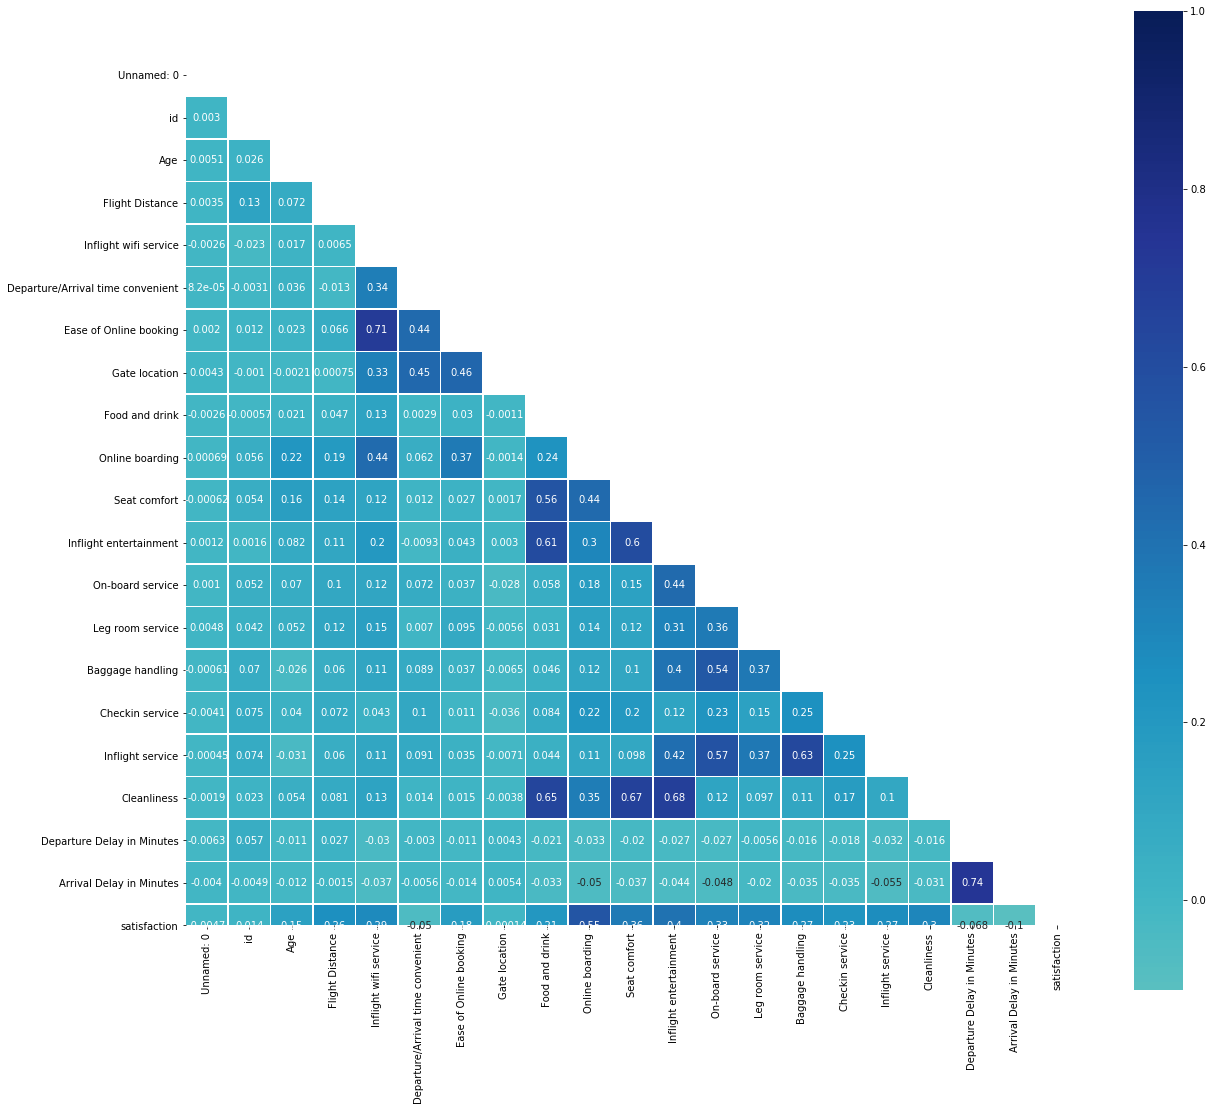

In [12]:
corr = df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)
plt.show()

Checking if the gender of the customer affects the rating given

In [13]:
print('No. of people satisfied by Airline:')
df.groupby('Gender')[['satisfaction']].sum()

No. of people satisfied by Airline:


,satisfaction
Gender,
Female,22534
Male,22491


In [14]:
print('No. of people participated in the study:')
df.groupby('Gender')[['satisfaction']].count()

No. of people participated in the study:


,satisfaction
Gender,
Female,52727
Male,51177


In [15]:
print('Percentage of satisfied people :')
df.groupby('Gender')[['satisfaction']].sum()/ df.groupby('Gender')[['satisfaction']].count()

Percentage of satisfied people :


,satisfaction
Gender,
Female,0.427371
Male,0.439475


# So, people's satisfaction does not depend on gender.

In [16]:
print('Satisfaction of people depending on the class:')
df.groupby('Class')[['satisfaction']].sum()

Satisfaction of people depending on the class:


,satisfaction
Class,
Business,34480
Eco,8701
Eco Plus,1844


In [17]:
print('How many people participated in the study:')
df.groupby('Class')[['satisfaction']].count()

How many people participated in the study:


,satisfaction
Class,
Business,49665
Eco,46745
Eco Plus,7494


In [18]:
print('Percentage of satisfacted people depending from the class:')
df.groupby('Class')[['satisfaction']].sum()/ df.groupby('Class')[['satisfaction']].count()

Percentage of satisfacted people depending from the class:


,satisfaction
Class,
Business,0.694251
Eco,0.186138
Eco Plus,0.246064


# We see here that satisfaction ratings seem to depend on the class. As people belonging to Business class seem do give a positive satisfied feedback

In [19]:
print('Percentage of satisfacted people depending from the type of travel:')
df.groupby('Type of Travel')[['satisfaction']].sum()/ df.groupby('Type of Travel')[['satisfaction']].count()

Percentage of satisfacted people depending from the type of travel:


,satisfaction
Type of Travel,
Business travel,0.582597
Personal Travel,0.101678


# Business travel also promotes to satisfaction.

Because our data contains categorical data, we must transform it to numbers before we will fit and evaluate a model.

We have categorical data:

Gender

Customer Type

Type of Travel

Class

In [20]:
data_dummies=pd.get_dummies(df, columns=["Gender","Customer Type","Type of Travel","Class"],drop_first=True)

In [21]:
data_dummies.head(3)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,5,25,18.0,0,1,0,1,0,1
1,1,5047,25,235,3,2,3,3,1,3,...,4,1,1,6.0,0,1,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,5,0,0.0,1,0,0,0,0,0


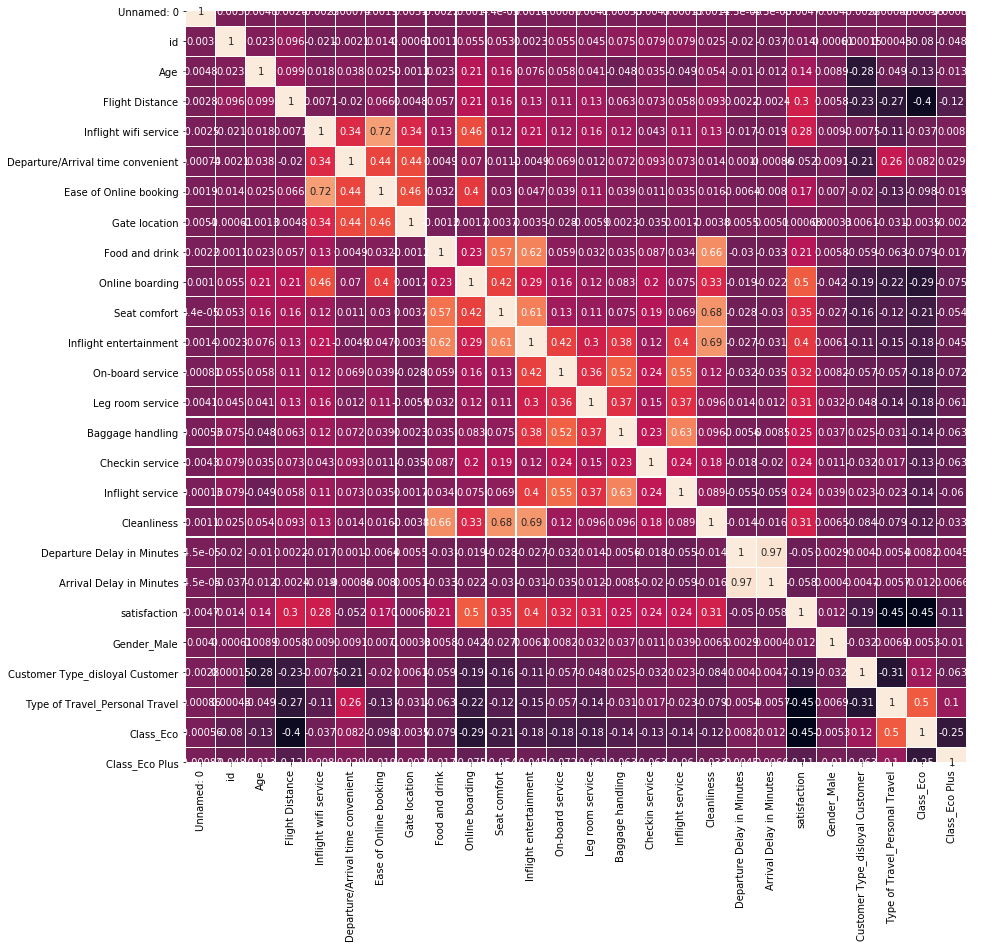

In [22]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data_dummies.corr(), annot=True, square=True, cbar=False, ax=ax, linewidths=0.25);

Here we see the high correlation between 'Departure Delay in Minutes', 'Arrival Delay in Minutes'. hence dropping arriving delay feature and keeping departure delay to create a prediction model would still be accurate

In [23]:
dfFinal = data_dummies.drop(columns=['Arrival Delay in Minutes', 'Unnamed: 0', 'id'])

In [24]:
dfFinal.head(4)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,0,0,0,0,0,0


In [25]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

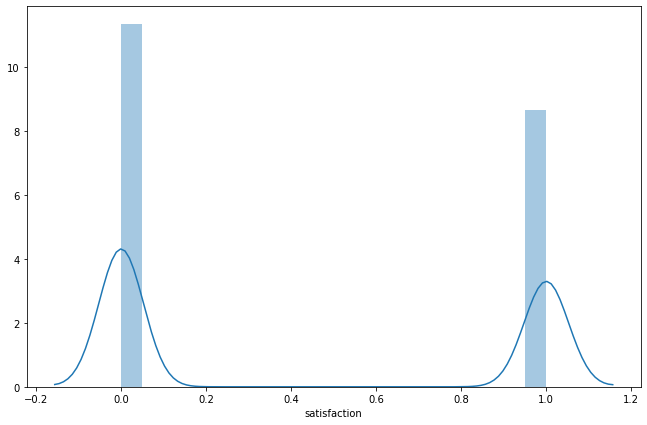

In [26]:
plt.figure(figsize=(11,7))
sns.distplot( df['satisfaction'] , bins=20)
plt.show()

C:\Users\prash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\prash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 792x648 with 0 Axes>

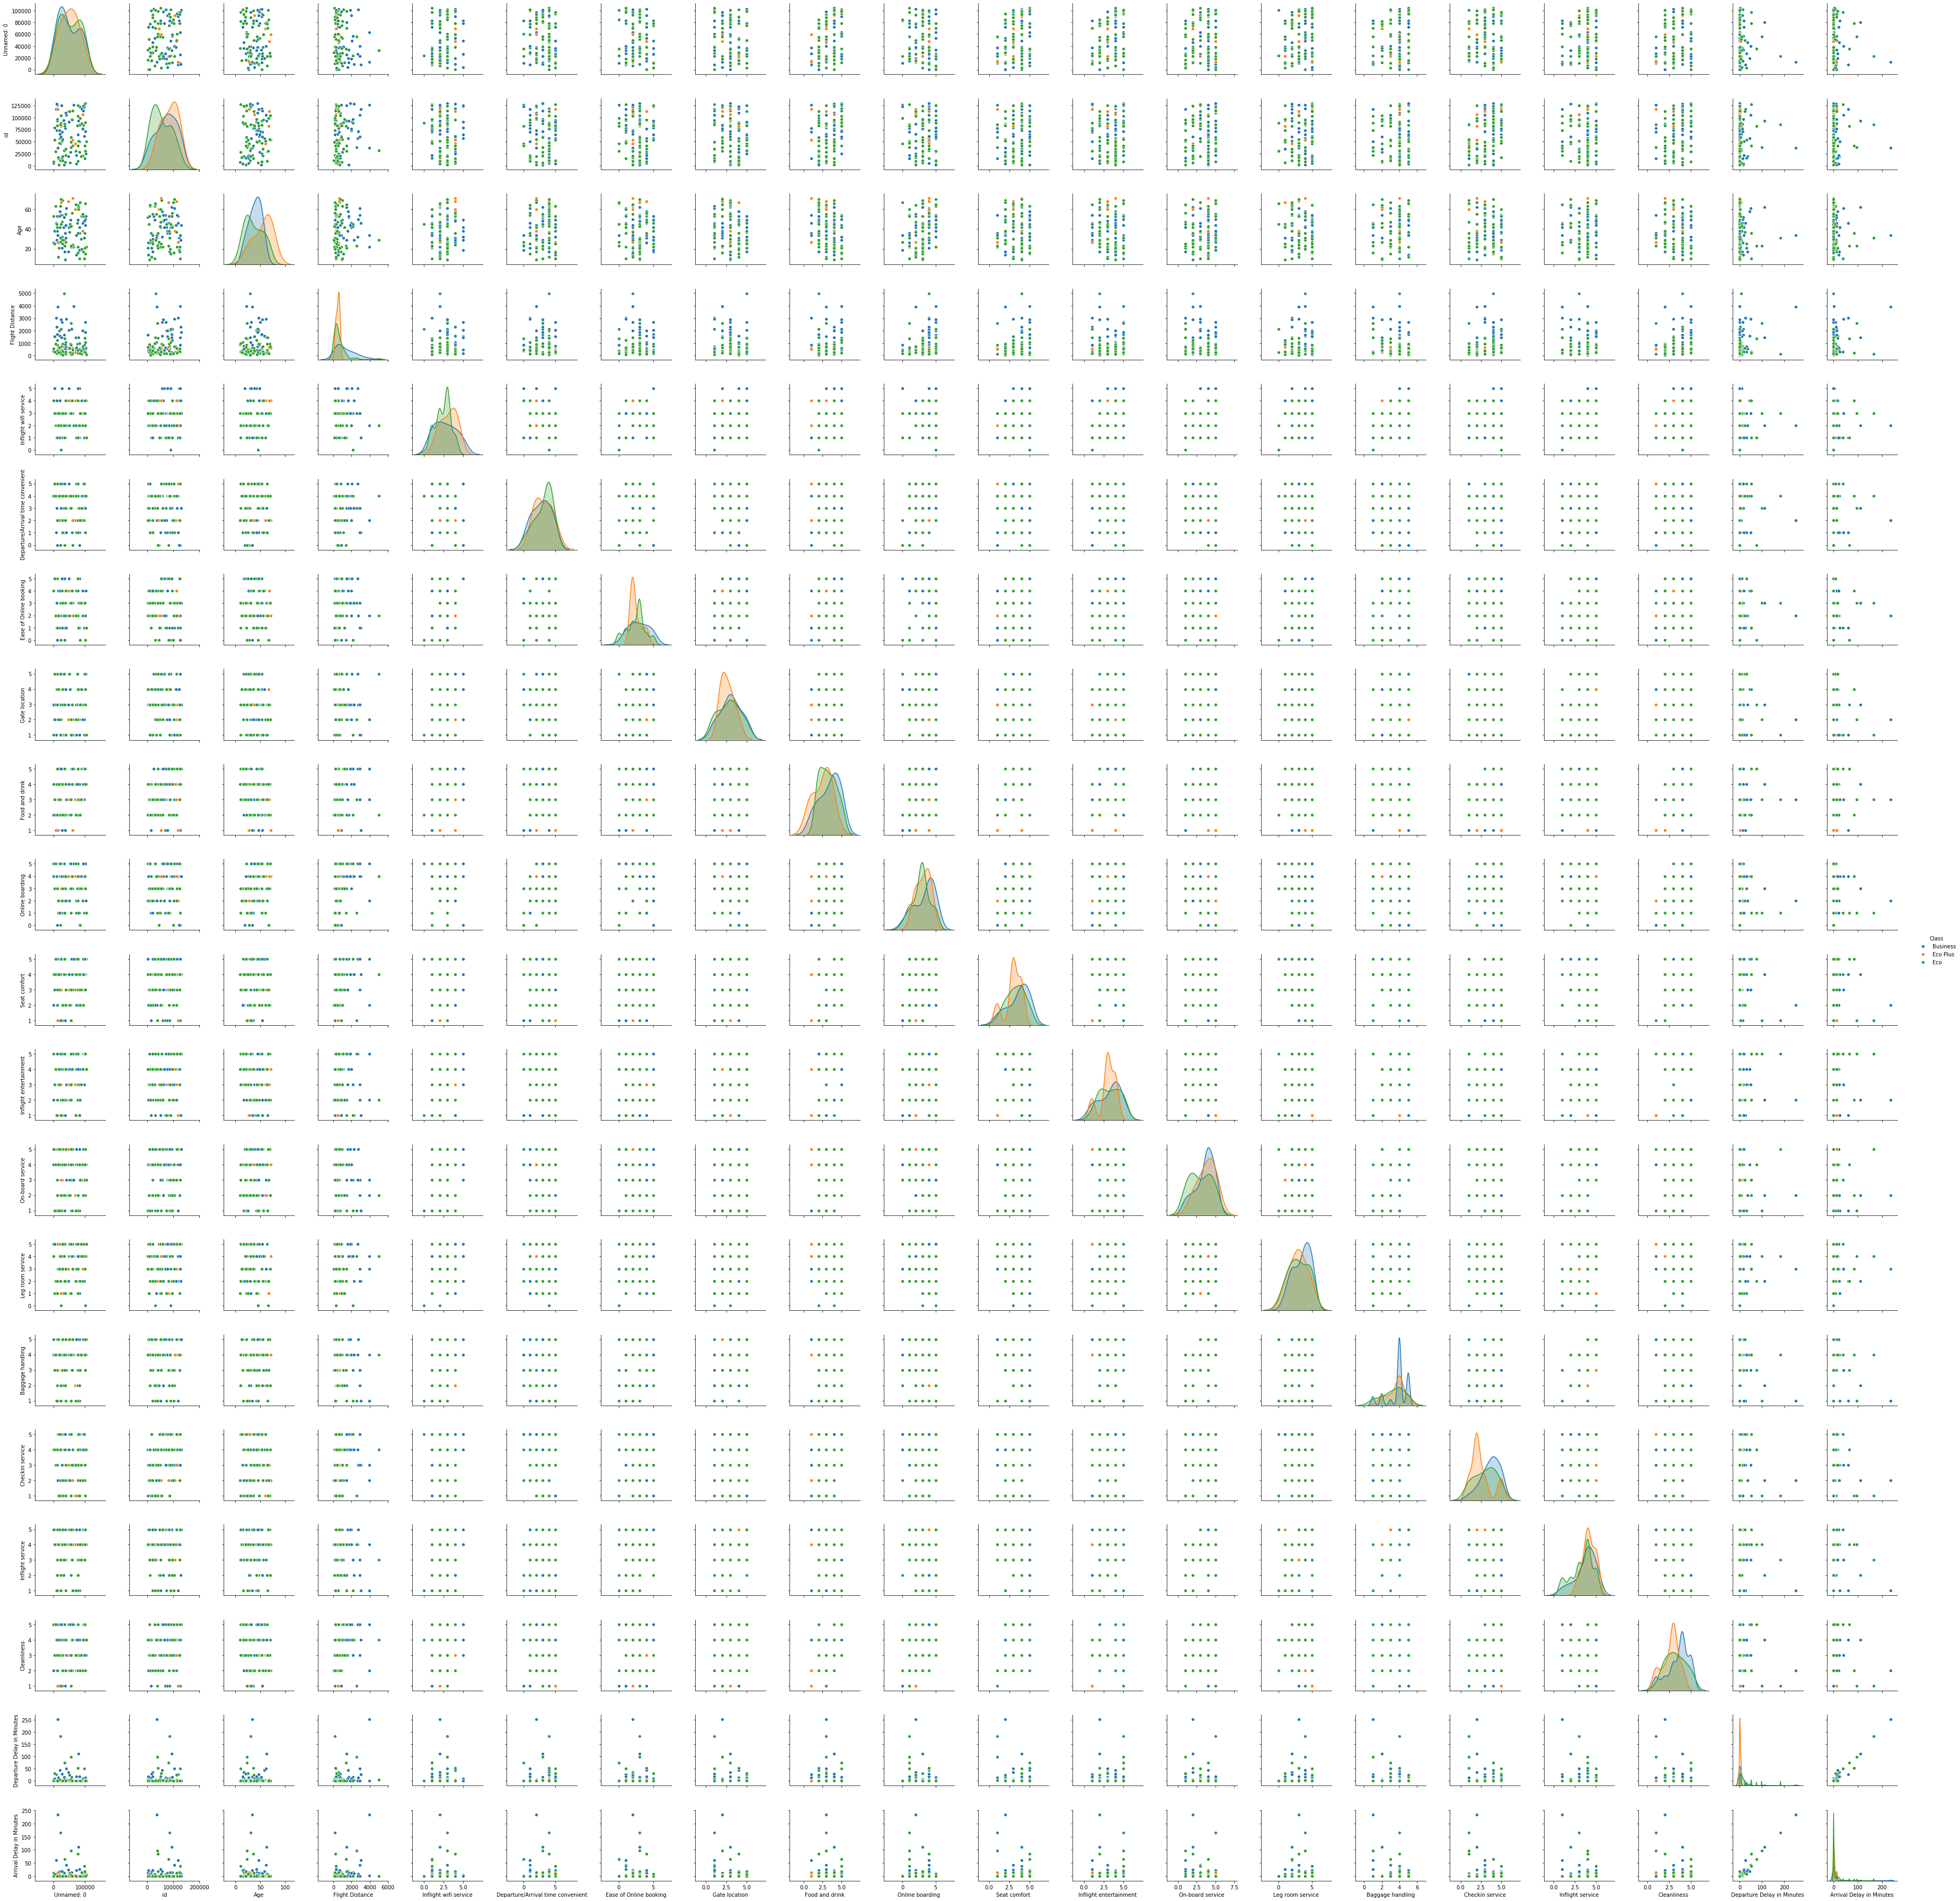

In [27]:
plt.figure(figsize=(11,9))
sns.pairplot(df2.sample(100),hue = 'Class')
plt.show()

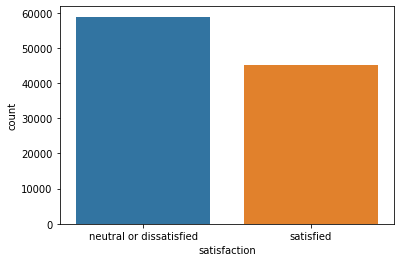

In [28]:
sns.countplot(x='satisfaction',data=df2)

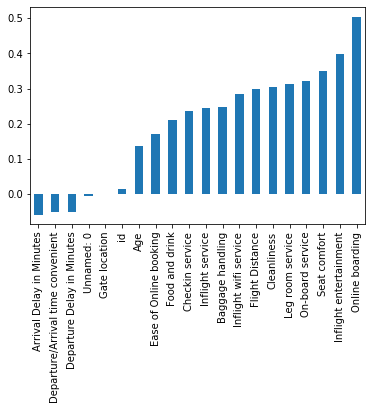

In [29]:
df.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

# online boarding has maximum correlation with satisfaction

Important continuous factors which contribute more correlation with customer satisfaction are 'Inflight wifi service','Flight Distance','cleanliness','Leg room service','on board service','seat comfort','inflight entertainment','online boarding'

In [30]:
df['Online boarding'].value_counts()

4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64

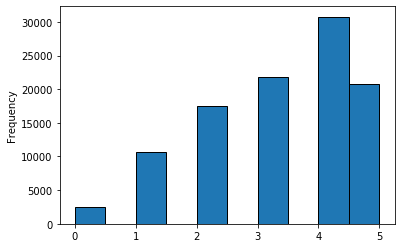

In [31]:
df['Online boarding'].plot(kind='hist',ec='black')

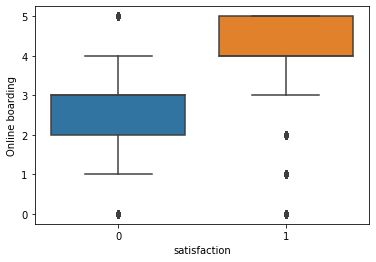

In [32]:
sns.boxplot(x='satisfaction',y = 'Online boarding',data=df)
plt.show()

The more satisfied the person is with online boarding then there are greater chances that the person will be satisfied.

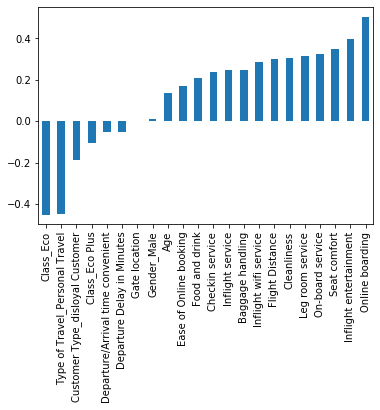

In [33]:
dfFinal.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

Analysing the catagorical variables, we came to know that People travelling in economy class and on a personal travel are unlikely to get satisfied.Now we know that people choosing online boarding are most satisfied. 

# Now that we know online boarding correlates with customer satisfaction we check the correlation of online boarding with other features

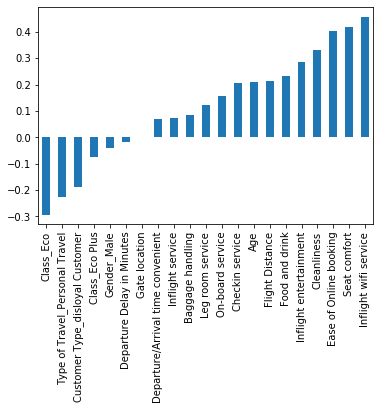

In [34]:
dfFinal.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfaction']).plot(kind='bar')

online boarding majorly correlated with inflight wifi service

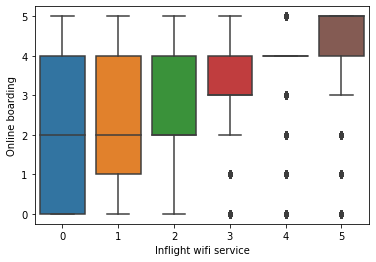

In [35]:
sns.boxplot(x='Inflight wifi service',y = 'Online boarding',data=dfFinal)

People who gets better service of inflight wifi likely to apply for online boarding and gives better rating.

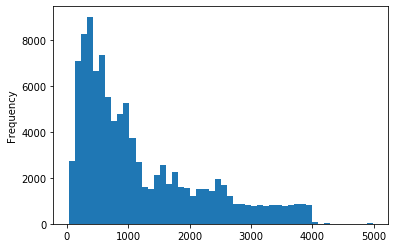

In [36]:
df['Flight Distance'].plot(kind='hist',bins=50)

In [37]:
#Most of the flights are between 0 to 1000 kms

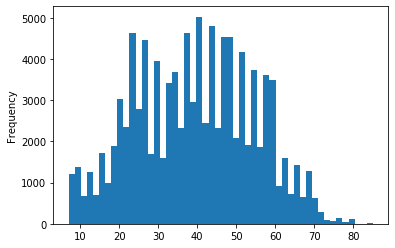

In [38]:
df['Age'].plot(kind='hist',bins=50)

In [39]:
#Age has a normal distribution with most people between 20 to 60

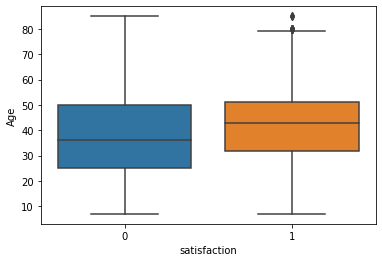

In [40]:
fig = sns.boxplot(x="satisfaction", y="Age",data=dfFinal)

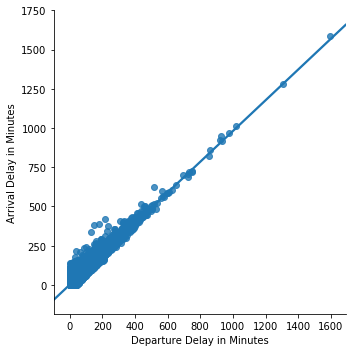

In [41]:
sns.lmplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df)

In [42]:
# high correlation b/w departure and arrival delay

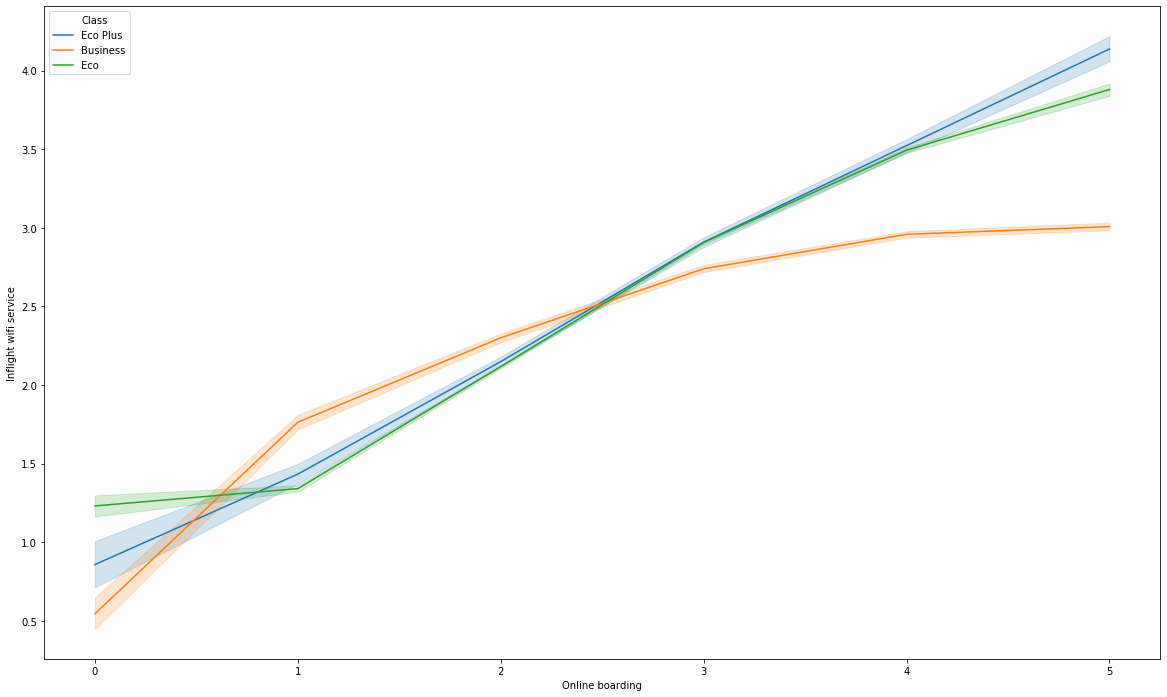

In [43]:
plt.figure(figsize=(20,12))
sns.lineplot(x=df['Online boarding'] , y=df['Inflight wifi service'] , hue=df['Class'] ) 
plt.legend()
plt.show()

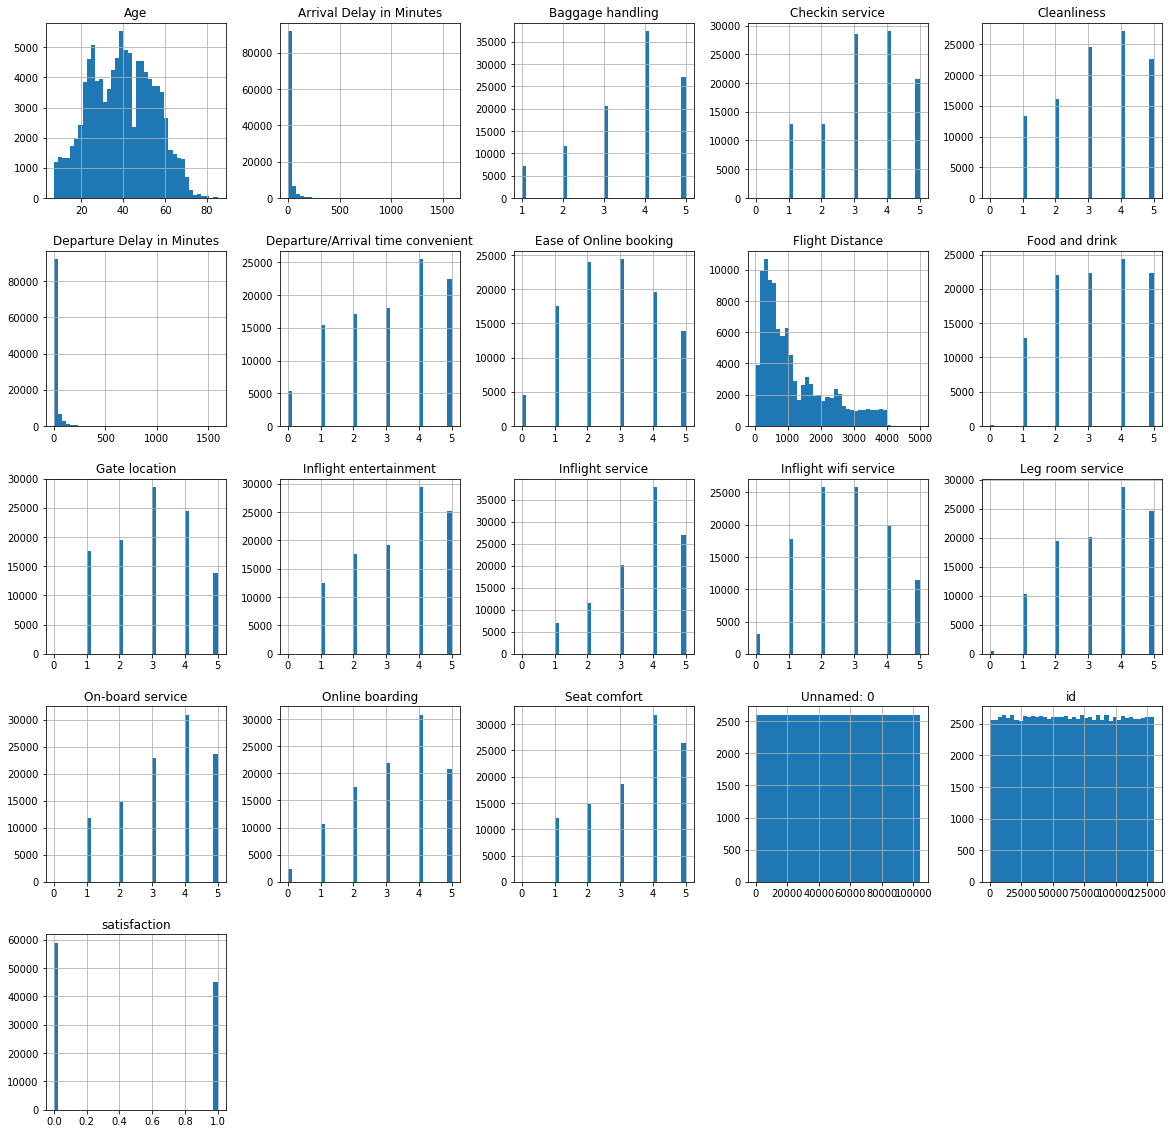

In [44]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist functionplt.show()
plt.show()

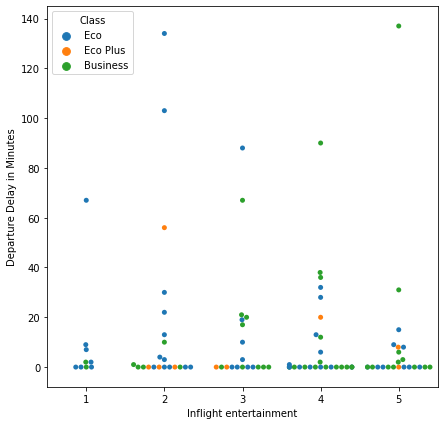

In [45]:
plt.figure(figsize=(7,7))
data4=df.sample(100)
sns.swarmplot(x=data4['Inflight entertainment'] , y=data4['Departure Delay in Minutes'] , hue=data4['Class'] )
plt.show()

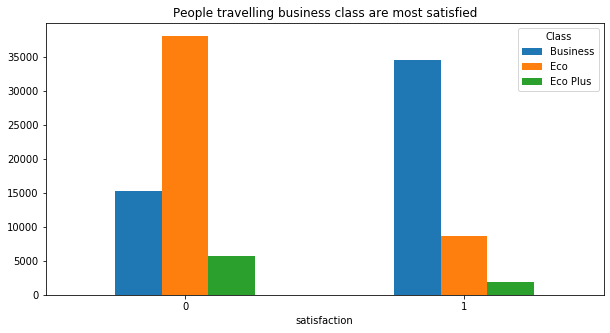

In [53]:
class_df = df.groupby(['satisfaction', 'Class'])['satisfaction'].count().unstack('Class')
class_df.plot(kind='bar',figsize = (10,5), rot=0, title='People travelling business class are most satisfied')

# Logistic Regression

In [49]:
train_df = pd.read_csv('AirlinePassengerSatisfactiondataset/train.csv')

In [54]:
train_df['Arrival Delay in Minutes'].fillna((train_df['Arrival Delay in Minutes'].mean()), inplace=True)
train_df = train_df.drop(['Unnamed: 0', 'id'], axis=1)

train_df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}, inplace=True)
train_df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
train_df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace=True)
train_df['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer': 1}, inplace=True)
train_df['Class'].replace({'Eco Plus': 0, 'Business': 1, 'Eco': 2}, inplace=True)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [56]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_df)
train_df = pd.DataFrame(scaler.transform(train_df), index = train_df.index, columns = train_df.columns)

In [57]:
x_train = train_df.drop('satisfaction', axis = 1)
y_train = train_df['satisfaction']

In [58]:
model = LogisticRegression(random_state = 24)
model.fit(x_train, y_train)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=24, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
test_df = pd.read_csv('AirlinePassengerSatisfactiondataset/test.csv')
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [60]:
test_df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}, inplace=True)
test_df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
test_df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace=True)
test_df['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer': 1}, inplace=True)
test_df['Class'].replace({'Eco Plus': 0, 'Business': 1, 'Eco': 2}, inplace=True)
test_df['Arrival Delay in Minutes'].fillna((test_df['Arrival Delay in Minutes'].mean()), inplace=True)
test_df = test_df.drop(['Unnamed: 0','id'], axis=1)

In [61]:
scaler.fit(test_df)
test_df = pd.DataFrame(scaler.transform(test_df), index = test_df.index, columns = test_df.columns)

In [62]:
x_test = test_df.drop('satisfaction',axis=1)
y_test = test_df['satisfaction']

In [63]:
y_pred = model.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
score = accuracy_score(y_test,y_pred)
score

0.8713812750230983

# Random Forest Classifier

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.model_selection import GridSearchCV

In [76]:
data_train = pd.read_csv('AirlinePassengerSatisfactiondataset/train.csv')
data_test = pd.read_csv('AirlinePassengerSatisfactiondataset/test.csv')
data_train['satisfaction'] = labelencoder.fit_transform(data_train['satisfaction'])
data_test['satisfaction'] = labelencoder.fit_transform(data_test['satisfaction'])
data_dummies=pd.get_dummies(data_train, columns=["Gender","Customer Type","Type of Travel","Class"],drop_first=True)
data_test=pd.get_dummies(data_test, columns=["Gender","Customer Type","Type of Travel","Class"],drop_first=True)
X_train = data_dummies.drop(columns=['Arrival Delay in Minutes', 'Unnamed: 0', 'id', 'satisfaction'])
X_test = data_test.drop(columns=['Arrival Delay in Minutes', 'Unnamed: 0', 'id', 'satisfaction'])
y_train = data_dummies['satisfaction']
y_test = data_test['satisfaction']

In [77]:
data_outliers = []
for col in X_train.columns:    
        Q_min = X_train[col].quantile(0.01)
        Q_max = X_train[col].quantile(0.99)
        idx = ((X_train[col] < Q_min) | (X_train[col] > Q_max))
        data_outliers.append(X_train[idx])

data_outliers = pd.concat(data_outliers)
data_cleared = X_train.drop(data_outliers.index.unique())
y_cleared = y_train.drop(data_outliers.index.unique())

In [69]:
def models_result(model, X_test, y_test):
    labels = model.predict(X_test)
    matrix = confusion_matrix(y_test, labels)
    sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    
    logit_roc_auc = roc_auc_score(y_test, labels)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show();
    
    print(classification_report(y_test, labels))

# Tuning Hyperparameters

Finding the hyperparameters to tune.

For the random forest classifier there are two main hyperparameters to tune

    1 max_features - max number of features considered for splitting a node
    
    2 n_estimators - number of trees in the foreset
    
There are other hyperparameters too such as

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node


But tuning them did not have a significant effect on the performance of the model.
Hence only the two above hyperparameters were used to tune.

In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [50, 75, 100]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_RandomForestClassifier = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
model_RandomForestClassifier = grid_search_RandomForestClassifier.fit(X_train, y_train)

print("Best: %f using %s" % (model_RandomForestClassifier.best_score_, model_RandomForestClassifier.best_params_))

Best: 0.962459 using {'max_features': 'log2', 'n_estimators': 100}


In [79]:
means = model_RandomForestClassifier.cv_results_['mean_test_score']
stds = model_RandomForestClassifier.cv_results_['std_test_score']
params = model_RandomForestClassifier.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.962016 (0.001517) with: {'max_features': 'sqrt', 'n_estimators': 50}
0.962071 (0.001638) with: {'max_features': 'sqrt', 'n_estimators': 75}
0.962392 (0.001609) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.961795 (0.001601) with: {'max_features': 'log2', 'n_estimators': 50}
0.962042 (0.001653) with: {'max_features': 'log2', 'n_estimators': 75}
0.962459 (0.001686) with: {'max_features': 'log2', 'n_estimators': 100}


In [80]:
model_RandomForestClassifier_cleared = grid_search_RandomForestClassifier.fit(data_cleared, y_cleared)
print("Result: %f" % (model_RandomForestClassifier_cleared.best_score_))

Result: 0.962343


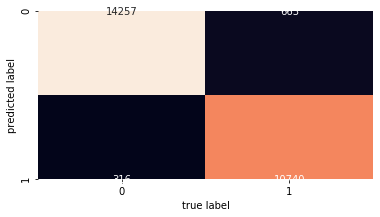

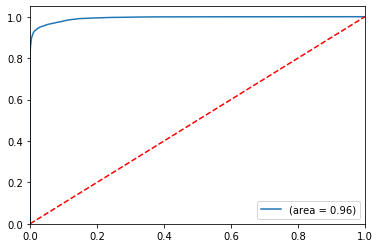

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [81]:
models_result(model_RandomForestClassifier, X_test, y_test)

# Bagging Classifier

In [82]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=28)
n_estimators = [40]
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_BaggingClassifier = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
model_BaggingClassifier = grid_search_BaggingClassifier.fit(X_train, y_train)

print("Result: %f" % (model_BaggingClassifier.best_score_))

Result: 0.960816


In [83]:
model_BaggingClassifier_cleared = grid_search_BaggingClassifier.fit(data_cleared, y_cleared)
print("Result: %f" % (model_BaggingClassifier_cleared.best_score_))

Result: 0.960946


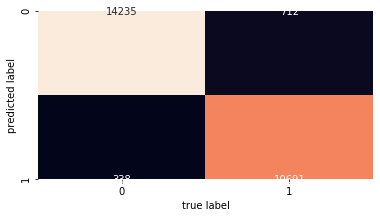

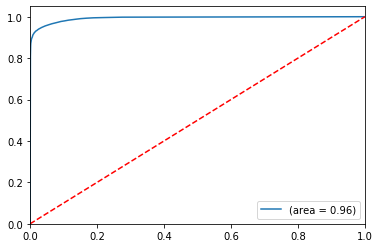

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [84]:
models_result(model_BaggingClassifier, X_test, y_test)

# Adaboost Classifier

In [85]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                        learning_rate = 1.1,
                        random_state=42)

n_estimators = [75]
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_ABC = GridSearchCV(estimator=ABC, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
model_ABC = grid_search_ABC.fit(X_train, y_train)

print("Result: %f" % (model_ABC.best_score_))

Result: 0.953467


In [86]:
model_ABC_cleared = grid_search_ABC.fit(data_cleared, y_cleared)
print("Result: %f" % (model_ABC_cleared.best_score_))

Result: 0.953346


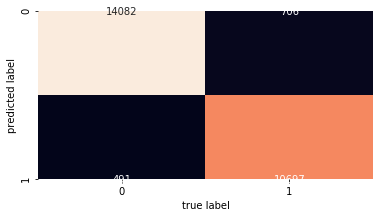

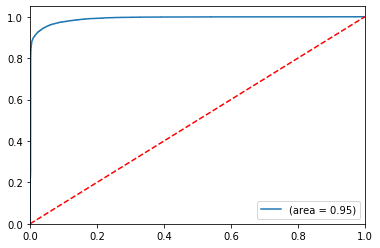

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [87]:
models_result(model_ABC, X_test, y_test)

# XGBoost Classifier

In [88]:
classifier2 = XGBClassifier(n_estimators = 500,n_jobs=-1)
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
y_pred = classifier2.predict(X_test)

In [90]:
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_xgboost = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976





Confusion matrix : 
[[14199   374]
 [  635 10768]]


Accuracy score : 0.9611564521096396


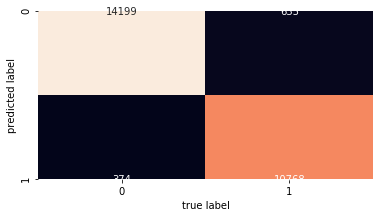

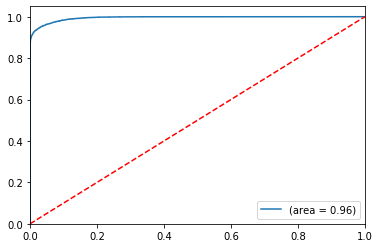

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [91]:
models_result(classifier2, X_test, y_test)

# Naive Bayes (General Classification)

In [92]:
classifier3 = GaussianNB()
classifier3.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

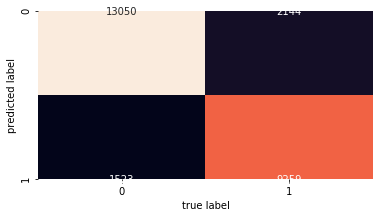

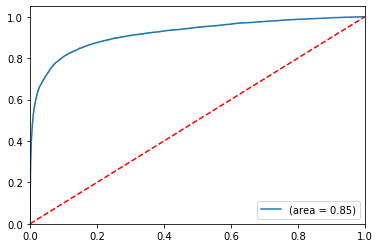

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14573
           1       0.86      0.81      0.83     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976



In [96]:
models_result(classifier3, X_test, y_test)

# Decision tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
clf = DecisionTreeClassifier(max_depth=12)

In [99]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
y_pred = clf.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred)

0.9501847859562673

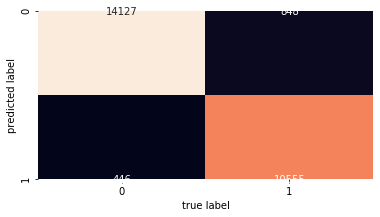

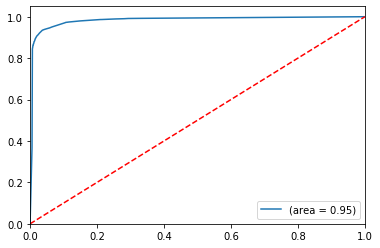

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [102]:
models_result(clf, X_test, y_test)

# Inference 


Random Forest works best for this problem.

Accuracy obtained for

Random Forest - 96.2%
Logistic Regression - 87.1%
Bagging - 96.01%
Adaboost - 95.3%
XGboost - 96.1%
Naive Bayes - 86%
Decision Tree - 95.01%